# **Ejercicio 2**
Consiste en crear dos parcelas para los ganadores de medallas de 2016 de cinco deportes: atletismo, natación, remo, fútbol y hockey. 

- Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible el patrón global de las características de height y weight de los ganadores de medallas de 2016 de los cinco deportes.

- Crea un gráfico utilizando una técnica de visualización adecuada que presente de la mejor manera posible la estadística de resumen para la altura y el peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en los datos.

Utilizar su creatividad y sus habilidades para sacar conclusiones importantes de los datos.

In [101]:
# Librerías necesarias

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

## **Datos de interés**

En esta sección se emplea el DataFrame "Olympics2016", que ha sido filtrado para incluir exclusivamente datos correspondientes al año 2016, el año de interés, y para eliminar las filas con valores nulos en la columna de medallas, reteniendo únicamente aquellos registros en los que los atletas obtuvieron medallas.

In [102]:
olympics_url = "C:/Users/sofmo/Desktop/athlete_events.csv"
olympics= pd.read_csv(olympics_url, usecols=['Sex', 'Age', 'Height', 'Weight','Team','Year','Sport','Medal'])
olympics2016 = olympics.loc[olympics['Year']==2016]
olympics2016 =  olympics2016[olympics2016['Medal'].notna()]
olympics2016.head(10)

,Sex,Age,Height,Weight,Team,Year,Sport,Medal
158,M,21.0,198.0,90.0,Italy,2016,Rowing,Bronze
161,F,21.0,165.0,49.0,Azerbaijan,2016,Taekwondo,Bronze
175,M,31.0,182.0,86.0,France,2016,Handball,Silver
450,M,26.0,170.0,80.0,Iran,2016,Wrestling,Bronze
794,M,24.0,161.0,62.0,Russia,2016,Gymnastics,Silver
796,M,24.0,161.0,62.0,Russia,2016,Gymnastics,Silver
797,M,24.0,161.0,62.0,Russia,2016,Gymnastics,Bronze
814,M,30.0,197.0,92.0,Australia,2016,Swimming,Bronze
1029,M,23.0,198.0,93.0,Spain,2016,Basketball,Bronze
1080,M,20.0,178.0,68.0,Jordan,2016,Taekwondo,Gold


## **Exploración de la características del DataFrame**

Examinemos algunos datos relevantes, como el tipo de variables presentes y los resúmenes estadísticos proporcionados por el método describe, que incluye medidas como la media, desviación estándar, valores mínimos y máximos, así como los cuartiles (25%, 50% o mediana, y 75%).

In [103]:
olympics2016_typesv = olympics2016.dtypes.reset_index()
olympics2016_typesv.columns = ['Varible', 'Tipo de variable']

| Variable | Tipo de variable |
|----------|------------------|
| Sex      | Categórica       |
| Age      | Numérica         |
| Height   | Numérica         |
| Weight   | Numérica         |
| Team     | Categórica       |
| Year     | Numérica         |
| Sport    | Categórica       |
| Medal    | Categórica       |


In [104]:
numeric_desc = olympics2016.describe()
categorical_desc = olympics2016.describe(include=object)
display(numeric_desc, categorical_desc)


,Age,Height,Weight,Year
count,2023.000000,2020.000000,2015.000000,2023.0
mean,26.325260,178.370792,73.961787,2016.0
std,5.149783,11.872888,16.216173,0.0
min,15.000000,140.000000,33.000000,2016.0
25%,23.000000,170.000000,63.000000,2016.0
50%,26.000000,178.000000,72.000000,2016.0
75%,29.000000,186.000000,83.500000,2016.0
max,58.000000,215.000000,160.000000,2016.0


,Sex,Team,Sport,Medal
count,2023,2023,2023,2023
unique,2,98,34,3
top,M,United States,Athletics,Bronze
freq,1054,256,192,703


## **Visualización del Patrón Global de Altura y Peso de los Medallistas de 2016** 

### **Scatterplot**

Para representar de la mejor manera posible el patrón global de las características de height y weight de los ganadores de medallas de 2016 se hace uso del **scatterplot** dado que es ideal para visualizar la relación entre la altura y el peso de los atletas, permitiendo identificar patrones, correlaciones, y diferencias entre deportes y géneros de manera clara y directa.

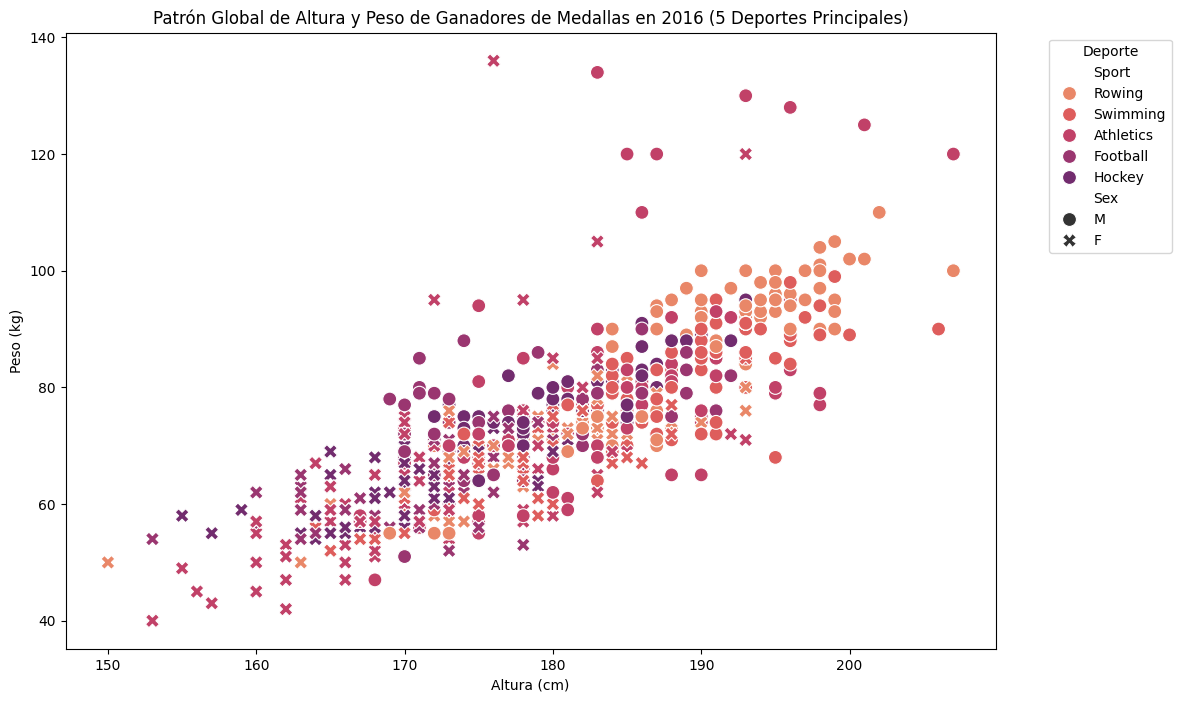

In [105]:
top5_sports = olympics2016['Sport'].value_counts().head(5).index
top5_sports_data = olympics2016[olympics2016['Sport'].isin(top5_sports)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Height', y='Weight', hue='Sport', data=top5_sports_data, palette="flare", style='Sex', s=100)
plt.title('Patrón Global de Altura y Peso de Ganadores de Medallas en 2016 (5 Deportes Principales)')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.legend(title='Deporte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

El gráfico de dispersión revela una clara correlación positiva entre la altura y el peso de los ganadores de medallas en los cinco deportes principales de los Juegos Olímpicos de 2016, mostrando que los atletas más altos tienden a ser más pesados. En particular, los atletas de Remo destacan por ser los más altos y pesados, mientras que en Natación y Atletismo hay una mayor diversidad en las características físicas debido a la variedad de pruebas. Además, se observan diferencias significativas entre géneros, donde los hombres, en general, son más altos y pesados que las mujeres en todos los deportes representados.

### **Violinplot**

Adicionalmente, se hace uso del violin plot dado que complementa al scatterplot al mostrar la densidad y la variabilidad de los datos, permitiendo una comparación más detallada entre deportes y géneros, además de visualizar cómo se distribuyen las características físicas dentro de cada grupo.

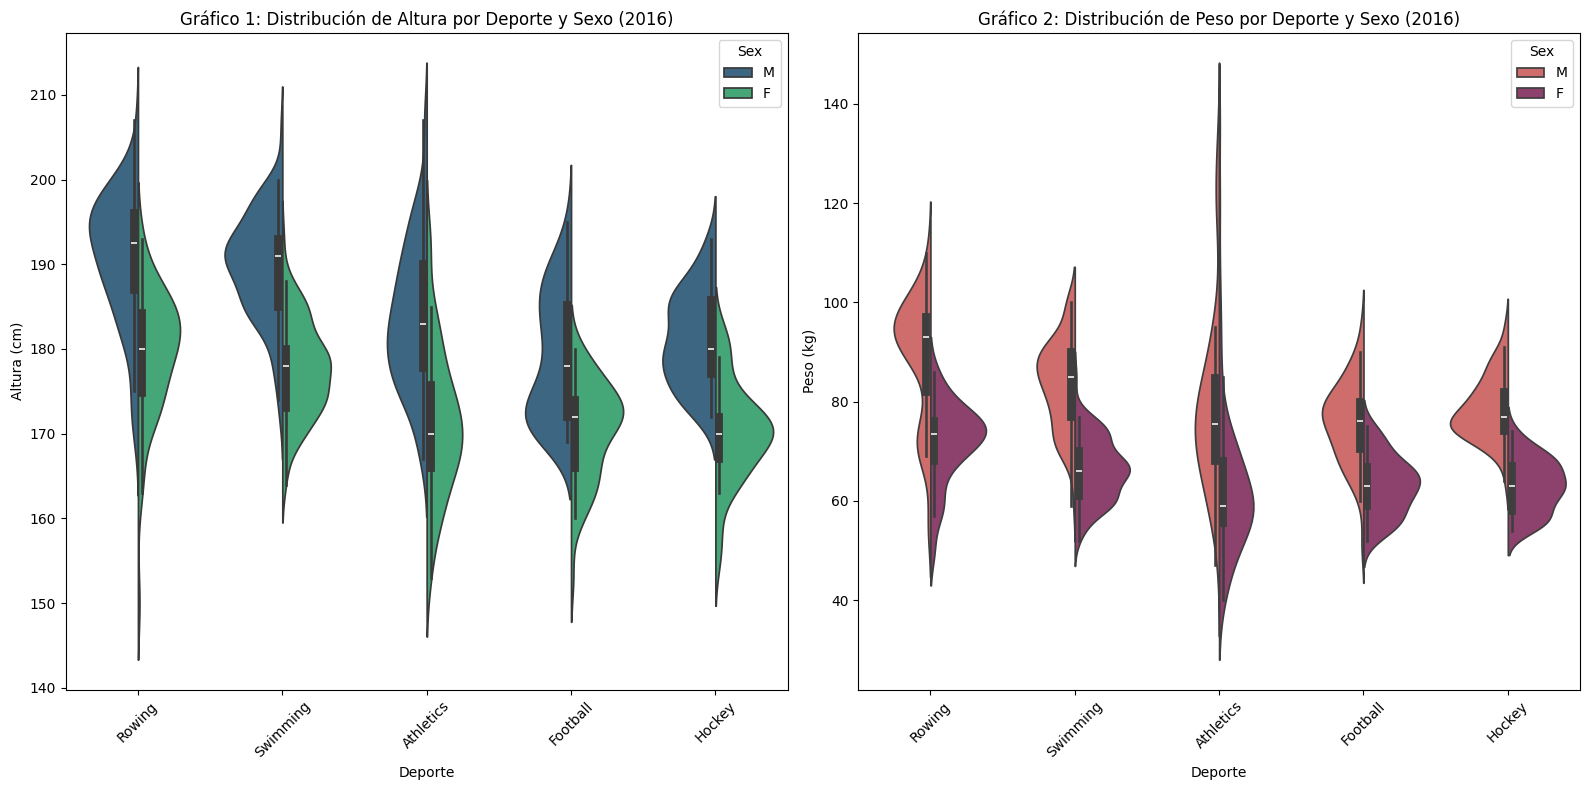

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

sns.violinplot(ax=axes[0], x='Sport', y='Height', hue='Sex', data=top5_sports_data, split=True, palette="viridis")
axes[0].set_title('Gráfico 1: Distribución de Altura por Deporte y Sexo (2016)')
axes[0].set_xlabel('Deporte')
axes[0].set_ylabel('Altura (cm)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

sns.violinplot(ax=axes[1], x='Sport', y='Weight', hue='Sex', data=top5_sports_data, split=True, palette="flare")
axes[1].set_title('Gráfico 2: Distribución de Peso por Deporte y Sexo (2016)')
axes[1].set_xlabel('Deporte')
axes[1].set_ylabel('Peso (kg)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()



**Gráfico 1:** El gráfico de violín muestra la distribución de la altura de los ganadores de medallas en los cinco deportes principales de los Juegos Olímpicos de 2016, desglosado por sexo. Se observa que los hombres (en azul) tienden a ser más altos que las mujeres (en verde) en todos los deportes analizados. En deportes como Remo y Atletismo, la distribución de alturas es más amplia, indicando una mayor variabilidad en la altura de los atletas. Por otro lado, en Natación y Fútbol, la altura de los atletas está más concentrada en un rango específico. Además, se destaca que en Remo, tanto hombres como mujeres tienen las alturas más altas en comparación con otros deportes, lo que sugiere que la altura es un factor importante en el rendimiento de este deporte.

**Gráfico 2:** Se observa que los hombres tienen un peso medio más alto que las mujeres en todos los deportes. En Remo y Atletismo, la distribución del peso es más amplia, lo que indica una mayor variabilidad en los pesos de los atletas, especialmente entre los hombres. Remo destaca con los pesos más altos tanto para hombres como para mujeres, lo que sugiere que un mayor peso podría ser una ventaja en este deporte. Por otro lado, en Natación y Fútbol, el peso está más concentrado en un rango específico, con menor variabilidad. Este gráfico resalta cómo las características físicas, como el peso, varían significativamente entre los deportes y entre los géneros, con patrones específicos en cada disciplina.

## **Visualización de la Estadística de Resumen de Altura y Peso según el Tipo de Medalla**

### **Bloxplot**

Para presentar de la mejor manera posible la estadística de resumen de altura y peso de los jugadores que ganaron cada tipo de medalla (oro/plata/bronce) en 2016, se hace uso del boxplot dado que es ideal para visualizar la mediana, el rango intercuartílico, y los valores atípicos de cada grupo, permitiendo comparar de manera efectiva las distribuciones de altura y peso entre los diferentes tipos de medalla.

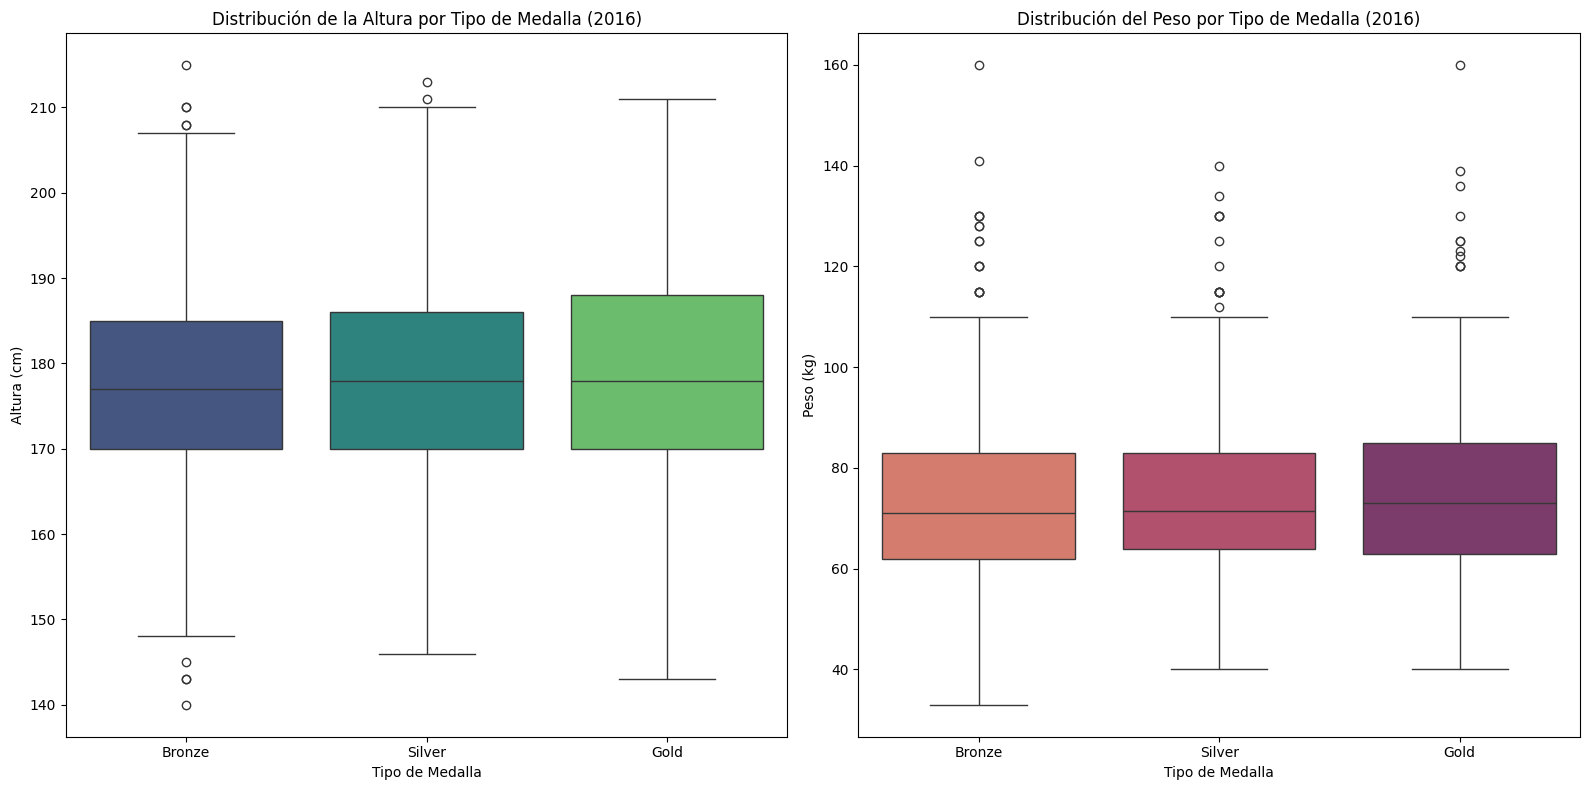

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Boxplot para Altura
sns.boxplot(ax=axes[0], x='Medal', y='Height', data=olympics2016, palette="viridis")
axes[0].set_title('Distribución de la Altura por Tipo de Medalla (2016)')
axes[0].set_xlabel('Tipo de Medalla')
axes[0].set_ylabel('Altura (cm)')

# Boxplot para Peso
sns.boxplot(ax=axes[1], x='Medal', y='Weight', data=olympics2016, palette="flare")
axes[1].set_title('Distribución del Peso por Tipo de Medalla (2016)')
axes[1].set_xlabel('Tipo de Medalla')
axes[1].set_ylabel('Peso (kg)')

plt.tight_layout()
plt.show()


Los gráficos de caja muestran la distribución de la altura y el peso de los ganadores de medallas de bronce, plata y oro en los Juegos Olímpicos de 2016. Se observa que los medallistas de oro tienden a ser más altos y tener una mayor variabilidad en altura, mientras que los medallistas de bronce y plata presentan alturas más concentradas en un rango menor. En cuanto al peso, aunque la mediana es similar entre los tres tipos de medallas, los ganadores de oro muestran una mayor variabilidad, con un rango más amplio, y también tienen más valores atípicos en el extremo superior, lo que podría indicar que los atletas más pesados tienen más posibilidades de ganar en ciertos deportes.

### **Barplot**

Los barplots complementan a los boxplots al destacar la media de altura y peso de los ganadores de cada tipo de medalla, proporcionando una comparación directa y clara de los promedios entre los grupos. Además, las barras de error en los barplots permiten visualizar la variabilidad en torno a la media, ofreciendo una perspectiva adicional que resalta las tendencias generales en las características físicas de los medallistas.

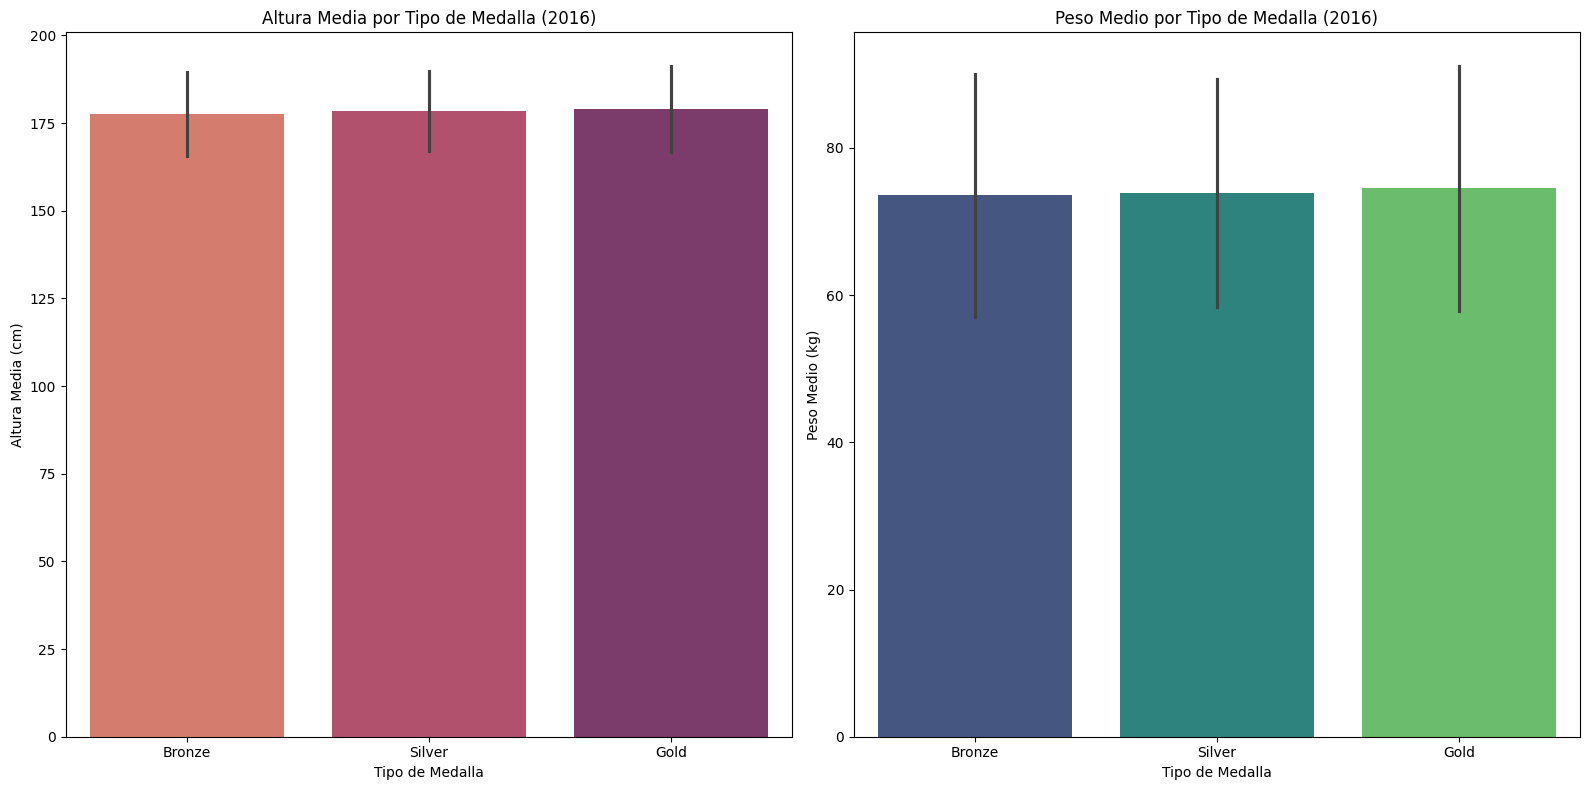

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una figura con dos subplots, uno para altura y otro para peso
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Barplot para Altura
sns.barplot(ax=axes[0], x='Medal', y='Height', data=olympics2016, ci="sd", palette="flare")
axes[0].set_title('Altura Media por Tipo de Medalla (2016)')
axes[0].set_xlabel('Tipo de Medalla')
axes[0].set_ylabel('Altura Media (cm)')

# Barplot para Peso
sns.barplot(ax=axes[1], x='Medal', y='Weight', data=olympics2016, ci="sd", palette="viridis")
axes[1].set_title('Peso Medio por Tipo de Medalla (2016)')
axes[1].set_xlabel('Tipo de Medalla')
axes[1].set_ylabel('Peso Medio (kg)')

# Ajustar el diseño para que no se solapen los títulos y etiquetas
plt.tight_layout()
plt.show()


Los gráficos de barras muestran la altura y el peso promedio de los ganadores de medallas de bronce, plata y oro en los Juegos Olímpicos de 2016. En ambos gráficos, la altura y el peso medios de los medallistas son relativamente similares entre los tres tipos de medalla, con pequeñas diferencias que no parecen ser significativas. Las barras de error indican que la variabilidad dentro de cada grupo es considerable, lo que sugiere que, aunque los promedios son similares, la distribución de alturas y pesos entre los atletas puede variar considerablemente dentro de cada tipo de medalla. Esto refuerza la idea de que, aunque el éxito en términos de medallas no está fuertemente ligado a diferencias en la altura o el peso promedio, hay una diversidad en las características físicas de los atletas que logran el éxito en estos eventos.